In [256]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [257]:
t_train=pd.read_csv("train.csv")

In [258]:
t_test = pd.read_csv("test.csv")

In [259]:
# EDA of the given Data Set

In [260]:
t_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [261]:
t_train.shape

(891, 12)

In [262]:
t_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [263]:
t_train['Survived'].replace([0,1],['Dead','Alive'],inplace=True)

[]

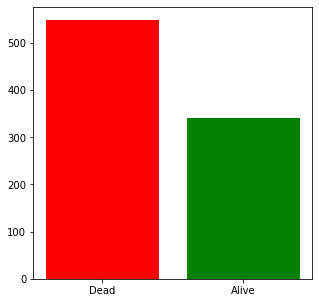

In [264]:
plt.figure(figsize=(5,5))
plt.bar(list(t_train['Survived'].value_counts().keys()),list(t_train['Survived'].value_counts()),color=['r','g'])
plt.plot()

In [265]:
t_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [266]:
# t_train['Pclass'].replace([1,2,3],['Class1','Class2','Class3'],inplace=True)

[]

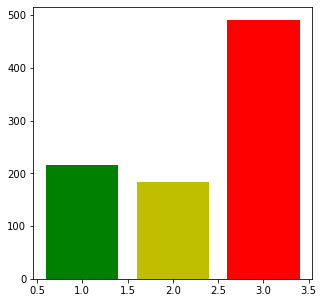

In [267]:
plt.figure(figsize=(5,5))
plt.bar(list(t_train['Pclass'].value_counts().keys()),list(t_train['Pclass'].value_counts()),color=["r","g",'y'])
plt.plot()

In [165]:
t_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

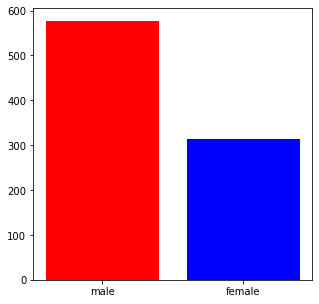

In [166]:
plt.figure(figsize=(5,5))
plt.bar(list(t_train['Sex'].value_counts().keys()),list(t_train['Sex'].value_counts()),color=['r','b'])
plt.show()

In [167]:
# Since age column is a numerical data we should use histograms for it

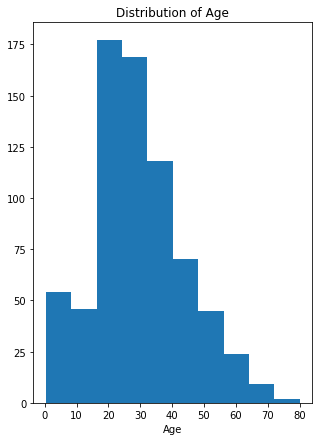

In [168]:
plt.figure(figsize=(5,7))
plt.hist(t_train['Age'])
plt.title("Distribution of Age")
plt.xlabel('Age')
plt.show()

In [169]:
# Data Cleaning

In [170]:
sum(t_train['Survived'].isnull())

0

In [177]:
t_train['Age']=t_train['Age'].fillna(t_train['Age'].mean())

In [179]:
t_train=t_train.dropna()

In [180]:
sum(t_train['Survived'].isnull())

0

In [181]:
sum(t_train['Age'].isnull())

0

In [182]:
# Independent Variable - Survived and Dependent Variable - Age

In [183]:
x_train=t_train[['Age']]
y_train=t_train[['Survived']]

In [184]:
from sklearn.tree import DecisionTreeClassifier

In [185]:
dtc = DecisionTreeClassifier()

In [186]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [187]:
# Checking null values over test set

In [188]:
sum(t_test['Age'].isnull())

86

In [189]:
t_test=t_test.dropna()

In [190]:
x_test=t_test[['Age']]

In [191]:
y_pred=dtc.predict(x_test)

In [192]:
y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
      dtype=int64)